In [2]:
import pandas as pd
import numpy as np 

df1 = pd.read_csv('./tmdb_5000_credits.csv')
df2 = pd.read_csv('./tmdb_5000_movies.csv')

In [3]:
df1.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [4]:
df2.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [5]:
df2['genres'].unique()

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
       '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
       ...,
       '[{"id": 53, "name": "Thriller"}, {"id": 27, "name": "Horror"}, {"id": 35, "name": "Comedy"}]',
       '[{"id": 10769, "name": "Foreign"}, {"id": 53, "name": "Thriller"}]',
       '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]'],
      dtype=object)

HIGH RATING MOVIES

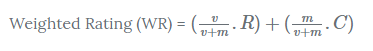

In [6]:
C = df2['vote_average'].mean()
C

6.092171559442016

In [7]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [8]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape # top 10% based on vote count

(481, 20)

In [9]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(v+m) * C)

In [10]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [11]:
q_movies = q_movies.sort_values('score', ascending=False)

q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

title  vote_count  vote_average  \
1881                       The Shawshank Redemption        8205           8.5   
662                                      Fight Club        9413           8.3   
65                                  The Dark Knight       12002           8.2   
3232                                   Pulp Fiction        8428           8.3   
96                                        Inception       13752           8.1   
3337                                  The Godfather        5893           8.4   
95                                     Interstellar       10867           8.1   
809                                    Forrest Gump        7927           8.2   
329   The Lord of the Rings: The Return of the King        8064           8.1   
1990                        The Empire Strikes Back        5879           8.2   

         score  
1881  8.059258  
662   7.939256  
65    7.920020  
3232  7.904645  
96    7.863239  
3337  7.851236  
95    7.809479  
809   7.803188  
329   7.727243  
1990  7.697884

TRENDING MOVIES

Text(0, 0.5, 'Popular Movies')

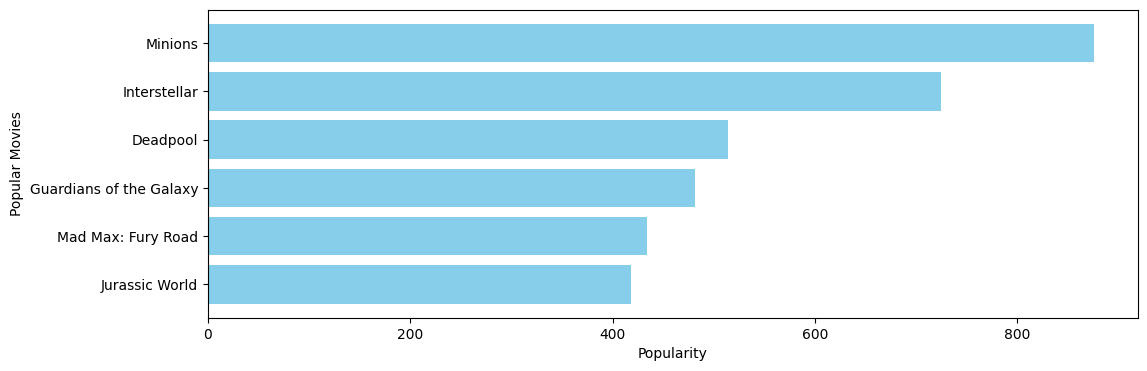

In [12]:
pop = df2.sort_values('popularity', ascending=False)

from matplotlib import pyplot as plt

plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6), pop['popularity'].head(6), align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Popularity')
plt.ylabel('Popular Movies')


CONTENT BASED FILTERING

In [13]:
def get_list(x):
    return [i['name'] for i in x]

In [14]:
from ast import literal_eval

cbf_movies = df2['genres'].copy().apply(literal_eval).apply(get_list)

cbf_movies

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

In [15]:
from numpy import log

list_genres = {}
def get_genres(x, lst=list_genres):
    for i in x:
        if i not in lst:
            lst[i] = 1
        else:
            lst[i] += 1

cbf_movies.apply(get_genres)
pd_count = pd.DataFrame(list_genres.items(), columns=['genre', 'count'])
pd_count['occurence'] = log(pd_count['count'].sum()) / log(pd_count['count']) 
pd_count.sort_values('count', ascending=False)

genre  count  occurence
5             Drama   2297   1.215334
10           Comedy   1722   1.262327
6          Thriller   1274   1.315527
0            Action   1154   1.333984
11          Romance    894   1.384096
1         Adventure    790   1.409751
4             Crime    696   1.437037
3   Science Fiction    535   1.497216
12           Horror    519   1.504487
8            Family    513   1.507290
2           Fantasy    424   1.554764
13          Mystery    348   1.607242
7         Animation    234   1.724171
14          History    197   1.780342
16            Music    185   1.801775
15              War    144   1.892608
17      Documentary    110   2.001052
9           Western     82   2.134447
18          Foreign     34   2.667313
19         TV Movie      8   4.523285

In [16]:
df2.shape[0]

4803

In [17]:
def weighted_cbf_genres(hst, pd_count=pd_count):
    weight = {}
    sumofhst = sum(hst.values())
    for genre in hst:
        value = hst[genre] * pd_count['occurence'].loc[pd_count['genre'] == genre].values[0] / sumofhst
        weight[genre] = value
    return weight

test = {'Action': 10, 'TV Movie': 1, 'Drama': 5}
weighted_cbf_genres(test)

{'Action': 0.8337400043400414,
 'TV Movie': 0.28270532517356145,
 'Drama': 0.37979190642537325}

In [18]:
df2.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [19]:
df2_copy = df2[['id', 'genres', 'vote_average']].copy()
df2_copy

id                                             genres  vote_average
0      19995  [{"id": 28, "name": "Action"}, {"id": 12, "nam...           7.2
1        285  [{"id": 12, "name": "Adventure"}, {"id": 14, "...           6.9
2     206647  [{"id": 28, "name": "Action"}, {"id": 12, "nam...           6.3
3      49026  [{"id": 28, "name": "Action"}, {"id": 80, "nam...           7.6
4      49529  [{"id": 28, "name": "Action"}, {"id": 12, "nam...           6.1
...      ...                                                ...           ...
4798    9367  [{"id": 28, "name": "Action"}, {"id": 80, "nam...           6.6
4799   72766  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...           5.9
4800  231617  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...           7.0
4801  126186                                                 []           5.7
4802   25975                [{"id": 99, "name": "Documentary"}]           6.3

[4803 rows x 3 columns]

In [20]:
for i in pd_count['genre']:
    df2_copy[i] = 0.0
df2_copy.head()

id                                             genres  vote_average  \
0   19995  [{"id": 28, "name": "Action"}, {"id": 12, "nam...           7.2   
1     285  [{"id": 12, "name": "Adventure"}, {"id": 14, "...           6.9   
2  206647  [{"id": 28, "name": "Action"}, {"id": 12, "nam...           6.3   
3   49026  [{"id": 28, "name": "Action"}, {"id": 80, "nam...           7.6   
4   49529  [{"id": 28, "name": "Action"}, {"id": 12, "nam...           6.1   

   Action  Adventure  Fantasy  Science Fiction  Crime  Drama  Thriller  ...  \
0     0.0        0.0      0.0              0.0    0.0    0.0       0.0  ...   
1     0.0        0.0      0.0              0.0    0.0    0.0       0.0  ...   
2     0.0        0.0      0.0              0.0    0.0    0.0       0.0  ...   
3     0.0        0.0      0.0              0.0    0.0    0.0       0.0  ...   
4     0.0        0.0      0.0              0.0    0.0    0.0       0.0  ...   

   Comedy  Romance  Horror  Mystery  History  War  Music  Documentary  \
0     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0   
1     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0   
2     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0   
3     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0   
4     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0   

   Foreign  TV Movie  
0      0.0       0.0  
1      0.0       0.0  
2      0.0       0.0  
3      0.0       0.0  
4      0.0       0.0  

[5 rows x 23 columns]

In [21]:
df2_copy['genres'] = df2_copy['genres'].apply(literal_eval).apply(get_list)
df2_copy.head()

id                                         genres  vote_average  \
0   19995  [Action, Adventure, Fantasy, Science Fiction]           7.2   
1     285                   [Adventure, Fantasy, Action]           6.9   
2  206647                     [Action, Adventure, Crime]           6.3   
3   49026               [Action, Crime, Drama, Thriller]           7.6   
4   49529           [Action, Adventure, Science Fiction]           6.1   

   Action  Adventure  Fantasy  Science Fiction  Crime  Drama  Thriller  ...  \
0     0.0        0.0      0.0              0.0    0.0    0.0       0.0  ...   
1     0.0        0.0      0.0              0.0    0.0    0.0       0.0  ...   
2     0.0        0.0      0.0              0.0    0.0    0.0       0.0  ...   
3     0.0        0.0      0.0              0.0    0.0    0.0       0.0  ...   
4     0.0        0.0      0.0              0.0    0.0    0.0       0.0  ...   

   Comedy  Romance  Horror  Mystery  History  War  Music  Documentary  \
0     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0   
1     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0   
2     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0   
3     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0   
4     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0   

   Foreign  TV Movie  
0      0.0       0.0  
1      0.0       0.0  
2      0.0       0.0  
3      0.0       0.0  
4      0.0       0.0  

[5 rows x 23 columns]

In [22]:
def weighted_cbf_movies(x, df, pd_count=pd_count):
    genres = []
    vote_avg = 0
    for i in x['id']:
        genres = x.genres.loc[x.id == i].values[0]
        vote_avg = x.vote_average.loc[x.id == i].values[0]
        for genre in genres:
            df[genre].loc[df.id == i] = vote_avg * pd_count.occurence.loc[pd_count.genre == genre].values[0]
    return df

In [41]:
test = df2_copy.copy()
test = weighted_cbf_movies(test, test)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2788\2125932542.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[genre].loc[df.id == i] = vote_avg * pd_count.occurence.loc[pd_count.genre == genre].values[0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2788\2125932542.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[genre].loc[df.id == i] = vote_avg * pd_count.occurence.loc[pd_count.genre == genre].values[0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2788\2125932542.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [24]:
df2_copy.copy()['genres'].loc[df2_copy['id'] == 285].values[0]

['Adventure', 'Fantasy', 'Action']

In [29]:
def personalized_genres(list_movie_id, df=df2_copy.copy()):
    sample = df.drop(['id', 'genres', 'vote_average'], axis=1).iloc[1]
    personalized = {}
    avg = []
    for movID in list_movie_id:
        for genre in df['genres'].loc[df['id'] == movID].values[0]:
            if genre not in personalized:
                personalized[genre] = 1
            else:
                personalized[genre] += 1
        avg.append(df['vote_average'].loc[df['id'] == movID].values[0])
    result = weighted_cbf_genres(personalized)
    avg = np.average(avg)
    for genre in result:
        sample[genre] = result[genre]*avg
    return sample


In [35]:
x = [19995, 285, 206647, 49026, 49529, 38757, 99861, 767, 209112]

personalized_genres(x)

Action             2.293711
Adventure          2.423989
Fantasy            1.527617
Science Fiction    1.103305
Crime              0.705973
Drama              0.298528
Thriller           0.323139
Animation          0.423517
Family             0.740486
Western            0.000000
Comedy             0.000000
Romance            0.000000
Horror             0.000000
Mystery            0.000000
History            0.000000
War                0.000000
Music              0.000000
Documentary        0.000000
Foreign            0.000000
TV Movie           0.000000
Name: 1, dtype: float64

In [36]:
df2['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [37]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [42]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [43]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [45]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [46]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]
    